In [1]:
###Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
boston = pd.read_csv('/BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
X = boston.iloc[:,:-1]
Y = boston['medv']

print("X")
print("")
print(X.head())
print("")
print("")
print("Y")
print(Y.head())

X

      crim    zn  indus  chas    nox  ...  rad  tax  ptratio       b  lstat
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3  396.90   4.98
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8  396.90   9.14
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8  392.83   4.03
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7  394.63   2.94
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7  396.90   5.33

[5 rows x 13 columns]


Y
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [15]:
X = np.array(X)
print(X[:5,:])
print("")
print(X.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]

(506, 13)


In [18]:
Y = np.array(Y)
print(Y.shape)
Y = Y.reshape((506,1))
print(Y.shape)

(506, 1)
(506, 1)


In [17]:
m=X.shape[0]
print("m:",m)
o = np.ones((m,1))
X = np.hstack((o,X))
print(X.shape)
print("")
print(X[:5,:])

m: 506
(506, 14)

[[1.0000e+00 6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01
  6.5750e+00 6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01
  3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01
  6.4210e+00 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01
  3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01
  7.1850e+00 6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01
  3.9283e+02 4.0300e+00]
 [1.0000e+00 3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01
  6.9980e+00 4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01
  3.9463e+02 2.9400e+00]
 [1.0000e+00 6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01
  7.1470e+00 5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01
  3.9690e+02 5.3300e+00]]


In [19]:
def FeatureNormalization(x):
    x = x[:,1:]
    m = x.shape[0]
    mean = np.mean(x,axis=0)
    std = np.std(x,axis=0)
    x_norm = (x-mean)/std
    o = np.ones((m,1))
    x_norm = np.hstack((o,x_norm))
    return x_norm,mean,std

In [20]:
X_norm,mean,std = FeatureNormalization(X)
X_norm[:5,:]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857,
        -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
        -0.66660821, -1.45900038,  0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101, -0.27259857,
        -0.74026221,  0.19427445,  0.36716642,  0.55715988, -0.8678825 ,
        -0.98732948, -0.30309415,  0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101, -0.27259857,
        -0.74026221,  1.28271368, -0.26581176,  0.55715988, -0.8678825 ,
        -0.98732948, -0.30309415,  0.39642699, -1.2087274 ],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771, -0.27259857,
        -0.83528384,  1.01630251, -0.80988851,  1.07773662, -0.75292215,
        -1.10611514,  0.1130321 ,  0.41616284, -1.36151682],
       [ 1.        , -0.41248185, -0.48772236, -1.30687771, -0.27259857,
        -0.83528384,  1.22857665, -0.51117971,  1.07773662, -0.75292215,
        -1.10611514,  0.11

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_norm,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 14)
(102, 14)
(404, 1)
(102, 1)


In [22]:
def InitialParameters(x):
    n = x.shape[1]
    theta =np.zeros(n)
    theta=theta.reshape((14,1))
    return theta


In [23]:
def CostFunction(x,y,theta):
    h = np.dot(x,theta)
    m = float(x.shape[0])
    J = np.sum(((h - y)**2))/2*m
    return J,h

In [25]:
def GradDescent(x,y,theta,h):
    m = float(x.shape[0])
    d_theta = np.dot(x.transpose(),(h-y))
    return d_theta

In [26]:
alpha = 0.01
itr = 5000

theta = InitialParameters(X_train)

J_history = []
I_history = []

for i in range(itr):
    J,h = CostFunction(X_train,Y_train,theta)
    J_history.append(J)
    d_theta =GradDescent(X_train,Y_train,theta,h)
    theta -= alpha *(1/m)*d_theta
    I_history.append(i)

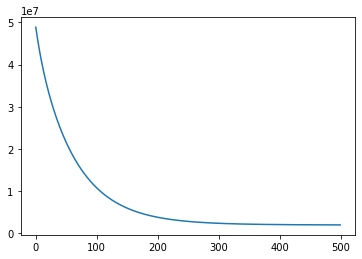

In [27]:
J_history = np.array(J_history)
J_history = J_history.reshape((5000,1))
J_history.shape

I_history = np.array(I_history)
I_history = I_history.reshape((5000,1))
I_history.shape

plt.plot(I_history[:500],J_history[:500])
plt.show()

In [30]:
theta

array([[ 2.24171828e+01],
       [-1.11120847e+00],
       [ 1.12210193e+00],
       [-7.90246674e-02],
       [ 6.99309281e-01],
       [-1.83374035e+00],
       [ 2.41128854e+00],
       [ 1.93459925e-02],
       [-3.14579541e+00],
       [ 2.94348787e+00],
       [-1.96023673e+00],
       [-2.05088705e+00],
       [ 1.06942009e+00],
       [-4.22808442e+00]])

In [28]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100

In [29]:
Y_test_predict= np.dot(X_test,theta)
mse_test = np.square(np.subtract(Y_test,Y_test_predict)).mean()
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is',mse_test)
print("MAPE:",mape(Y_test,Y_test_predict))

The model performance for testing set
--------------------------------------
MSE is 20.779838254200367
MAPE: 17.212046028760785
